
# **Exoplanet Classification Using Neural Networks**

---

**Authors:** Sebastián Machado and Sebastian Verdugo.


**Date:** December 3, 2025

---

## **1.  INTRODUCTION**

### 1.1 Problem Context

The search for exoplanets (planets outside our solar system) is one of the most active fields in modern astronomy. NASA's Kepler mission has identified thousands of exoplanet candidates using the transit method, which detects tiny dips in a star's brightness when a planet passes in front of it.

However, not all candidates are actual exoplanets; some are false positives caused by other astrophysical phenomena. Accurately classifying these objects is crucial for astronomical research.

### 1.2 Project Objective

Develop and optimize a Neural Network model capable of classifying celestial objects as:
- **CONFIRMED**: Confirmed exoplanets
- **FALSE POSITIVE**: Erroneous detections

Unconfirmed candidates will be excluded to focus on cases with a definitive diagnosis.

### 1. 3 Methodology

The project follows these phases:
1. Exploratory Data Analysis
2. Preprocessing and Transformation of Variables
3. Development of a Baseline Neural Network Model
4. Hyperparameter Optimization (Fine-Tuning)
5. Evaluation and Comparison of Models
6. Prediction with New Data
7. Conclusions

## **2. Library Importation**

In [1]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Librerías de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Librerías de Deep Learning (Keras/TensorFlow)
import tensorflow as tf
from tensorflow import keras
from tensorflow. keras.models import Sequential
from tensorflow.keras. layers import Dense, Dropout
from tensorflow. keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Para subir archivos en Google Colab
from google.colab import files

# Configuración de warnings
import warnings
warnings. filterwarnings('ignore')

# Configuración de semilla para reproducibilidad
np.random.seed(42)
tf. random.set_seed(42)

print("✓ Librerías importadas correctamente")
print(f"Versión de TensorFlow: {tf.__version__}")

✓ Librerías importadas correctamente
Versión de TensorFlow: 2.19.0


In [2]:
# Instalar MLflow
! pip install mlflow

# Importar MLflow
import mlflow
import mlflow.keras
from mlflow.tracking import MlflowClient

print("✓ MLflow instalado e importado correctamente")
print(f"Versión de MLflow: {mlflow.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.2/764.2 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.7 MB/s eta 0:00:00
✓ MLflow instalado e importado correctamente
Versión de MLflow: 3.7.0


In [3]:
# Configurar MLflow
mlflow.set_tracking_uri("file:./mlruns")  # Guarda los experimentos localmente
mlflow.set_experiment("Clasificacion_Exoplanetas")

print("✓ MLflow configurado")
print(f"Tracking URI: {mlflow.get_tracking_uri()}")
print(f"Experimento activo: {mlflow.get_experiment_by_name('Clasificacion_Exoplanetas').name}")

2025/12/15 19:34:02 INFO mlflow.tracking.fluent: Experiment with name 'Clasificacion_Exoplanetas' does not exist. Creating a new experiment.


✓ MLflow configurado
Tracking URI: file:./mlruns
Experimento activo: Clasificacion_Exoplanetas


## **3. DATASET LOADING AND INITIAL EXPLORATION**

### 3.1 Dataset Description

The dataset comes from the NASA Exoplanet Archive - Kepler Cumulative Table, which contains information about objects of interest (KOI - Kepler Objects of Interest) detected by the Kepler space telescope.

Dataset dimensions: 9564 rows × 83 columns

**Source:** https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative

### 3.2 File Loading

In [4]:
# Solicitar al usuario que suba el archivo CSV
print("Por favor, sube el archivo CSV del dataset de exoplanetas:")
uploaded = files.upload()

# Obtener el nombre del archivo subido
filename = list(uploaded.keys())[0]
print(f"\n✓ Archivo '{filename}' cargado correctamente")

# Leer el archivo CSV
df_original = pd.read_csv(filename, comment='#')

print(f"\n Dimensiones del dataset: {df_original.shape[0]} filas × {df_original.shape[1]} columnas")

Por favor, sube el archivo CSV del dataset de exoplanetas:


Saving cumulative_2025.12.01_16.06.39.csv to cumulative_2025.12.01_16.06.39.csv

✓ Archivo 'cumulative_2025.12.01_16.06.39.csv' cargado correctamente

 Dimensiones del dataset: 9564 filas × 83 columnas


In [5]:
# Vista previa de los primeros registros
print("\n Primeras 5 filas del dataset:\n")
df_original.head()


 Primeras 5 filas del dataset:



,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070


In [6]:
# Información general del dataset
print("\n Información general del dataset:\n")
df_original.info()


 Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2747 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_vet_stat       9564 non-null   object 
 6   koi_vet_date       9564 non-null   object 
 7   koi_pdisposition   9564 non-null   object 
 8   koi_score          8054 non-null   float64
 9   koi_fpflag_nt      9564 non-null   int64  
 10  koi_fpflag_ss      9564 non-null   int64  
 11  koi_fpflag_co      9564 non-null   int64  
 12  koi_fpflag_ec      9564 non-null   int64  
 13  koi_disp_prov      9564 non-null   object 
 14  koi_comment        8355 non-null   object 
 15  koi_period         9564 non-null   f

In [7]:
# Estadísticas descriptivas
print("\n Estadísticas descriptivas de variables numéricas:\n")
df_original.describe()


 Estadísticas descriptivas de variables numéricas:



,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,...,9109.000000,9109.000000,8734.000000,8747.000000,8965.000000,8965.000000,8965.000000,8994.000000,8994.000000,8994.000000
mean,4782.500000,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,2.454999e+06,...,-0.316136,-0.165817,-0.000097,-0.000714,-0.012281,-0.045420,1.866561,-0.024244,-0.076749,1.812566
std,2761.033321,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,6.791896e+01,...,20.254777,20.534655,0.058224,0.092986,2.406550,2.573558,2.988742,2.382286,2.553758,2.986376
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,2.454954e+06,...,-742.430000,-417.900000,-4.000000,-6.000000,-25.100000,-75.900000,0.000000,-27.800000,-76.600000,0.000000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,2.454966e+06,...,-0.600000,-0.680000,-0.000210,-0.000220,-0.320000,-0.387000,0.170000,-0.310000,-0.390000,0.210000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,2.454970e+06,...,-0.000500,-0.034000,0.000000,0.000000,0.000000,0.000000,0.610000,-0.004000,-0.017000,0.583000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,2.455004e+06,...,0.570000,0.500000,0.000240,0.000240,0.309000,0.300000,2.160000,0.290000,0.300000,1.970000
max,9564.000000,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,1472.522306,2.456306e+06,...,549.500000,712.500000,1.190000,5.000000,45.680000,27.500000,88.600000,46.570000,34.000000,89.600000


### 3.3 Target Variable Analysis


In [8]:
# Identificar la columna de disposición
disposition_cols = [col for col in df_original.columns if 'disp' in col.lower()]
print(f"Columnas relacionadas con disposición: {disposition_cols}")

# IMPORTANTE: Usar koi_disposition (oficial) en lugar de koi_pdisposition (preliminar)
if 'koi_disposition' in df_original.columns:
    target_col = 'koi_disposition'
    print(f"\n Usando columna OFICIAL: '{target_col}'")
elif 'koi_pdisposition' in df_original. columns:
    target_col = 'koi_pdisposition'
    print(f"\n Usando columna preliminar: '{target_col}' (puede no tener CONFIRMED)")
else:
    target_col = disposition_cols[0] if disposition_cols else None
    print(f"\n Usando: '{target_col}'")

print(f"\n Variable objetivo identificada: '{target_col}'")
print(f"\nDistribución de clases:\n")
print(df_original[target_col]. value_counts())
print(f"\nPorcentajes:\n")
print(df_original[target_col].value_counts(normalize=True) * 100)

Columnas relacionadas con disposición: ['koi_disposition', 'koi_pdisposition', 'koi_disp_prov']

 Usando columna OFICIAL: 'koi_disposition'

 Variable objetivo identificada: 'koi_disposition'

Distribución de clases:

koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

Porcentajes:

koi_disposition
FALSE POSITIVE    50.595985
CONFIRMED         28.711836
CANDIDATE         20.692179
Name: proportion, dtype: float64


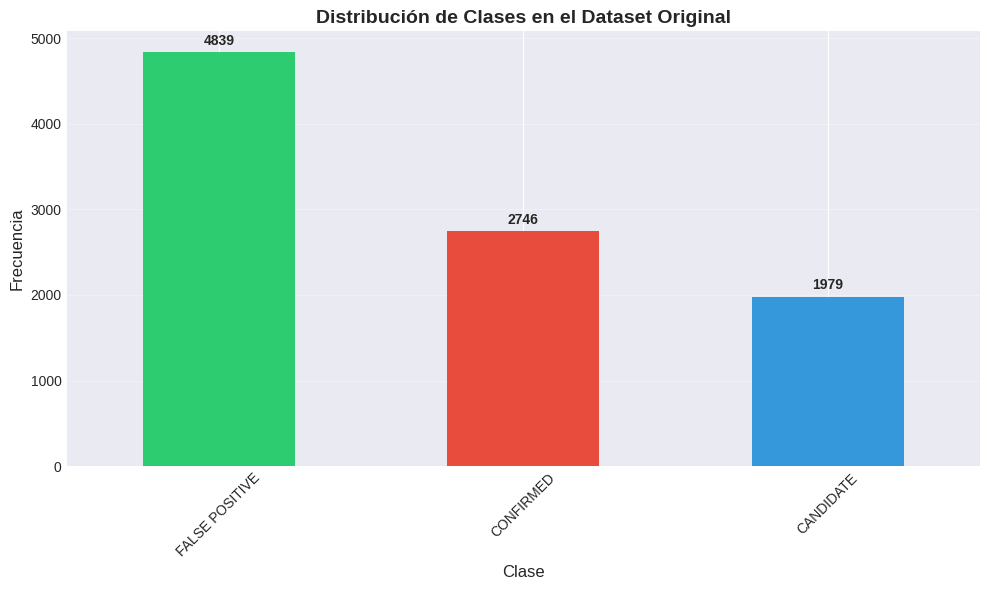

In [9]:
# Visualización de la distribución de clases
plt.figure(figsize=(10, 6))
ax = df_original[target_col].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c', '#3498db'])
plt. title('Distribución de Clases en el Dataset Original', fontsize=14, fontweight='bold')
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(df_original[target_col].value_counts()):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## **4. DATA PREPROCESSING**

### 4.1 Data Filtering

In [10]:
# Filtrar solo CONFIRMED y FALSE POSITIVE
df = df_original[df_original[target_col]. isin(['CONFIRMED', 'FALSE POSITIVE'])]. copy()

print(f" Dataset después del filtrado:")
print(f"   • Instancias originales: {df_original.shape[0]}")
print(f"   • Instancias filtradas: {df.shape[0]}")
print(f"   • Instancias eliminadas: {df_original.shape[0] - df.shape[0]}")
print(f"\n Nueva distribución de clases:")
print(df[target_col].value_counts())
print(f"\nPorcentajes:")
print(df[target_col].value_counts(normalize=True) * 100)

 Dataset después del filtrado:
   • Instancias originales: 9564
   • Instancias filtradas: 7585
   • Instancias eliminadas: 1979

 Nueva distribución de clases:
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
Name: count, dtype: int64

Porcentajes:
koi_disposition
FALSE POSITIVE    63.796968
CONFIRMED         36.203032
Name: proportion, dtype: float64


### 4.2 Missing Values Analysis


In [11]:
# Calcular porcentaje de valores faltantes por columna
missing_percentages = (df. isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Columna': missing_percentages.index,
    'Porcentaje_Faltante': missing_percentages.values
}).sort_values('Porcentaje_Faltante', ascending=False)

print("\n Top 20 columnas con más valores faltantes:\n")
print(missing_df.head(20))


 Top 20 columnas con más valores faltantes:

             Columna  Porcentaje_Faltante
49     koi_model_dof           100.000000
22       koi_ingress           100.000000
19         koi_longp           100.000000
50   koi_model_chisq           100.000000
58          koi_sage           100.000000
3        kepler_name            63.783784
70  koi_fwm_stat_sig            12.682927
8          koi_score            11.997363
47  koi_bin_oedp_sig            11.997363
75      koi_fwm_prao             9.835201
76     koi_fwm_pdeco             9.466051
14       koi_comment             9.017798
43  koi_num_transits             8.978247
40   koi_max_mult_ev             8.978247
39  koi_max_sngle_ev             8.978247
46      koi_quarters             8.978247
66          koi_zmag             6.842452
79    koi_dicco_msky             6.697429
77     koi_dicco_mra             6.697429
78    koi_dicco_mdec             6.697429


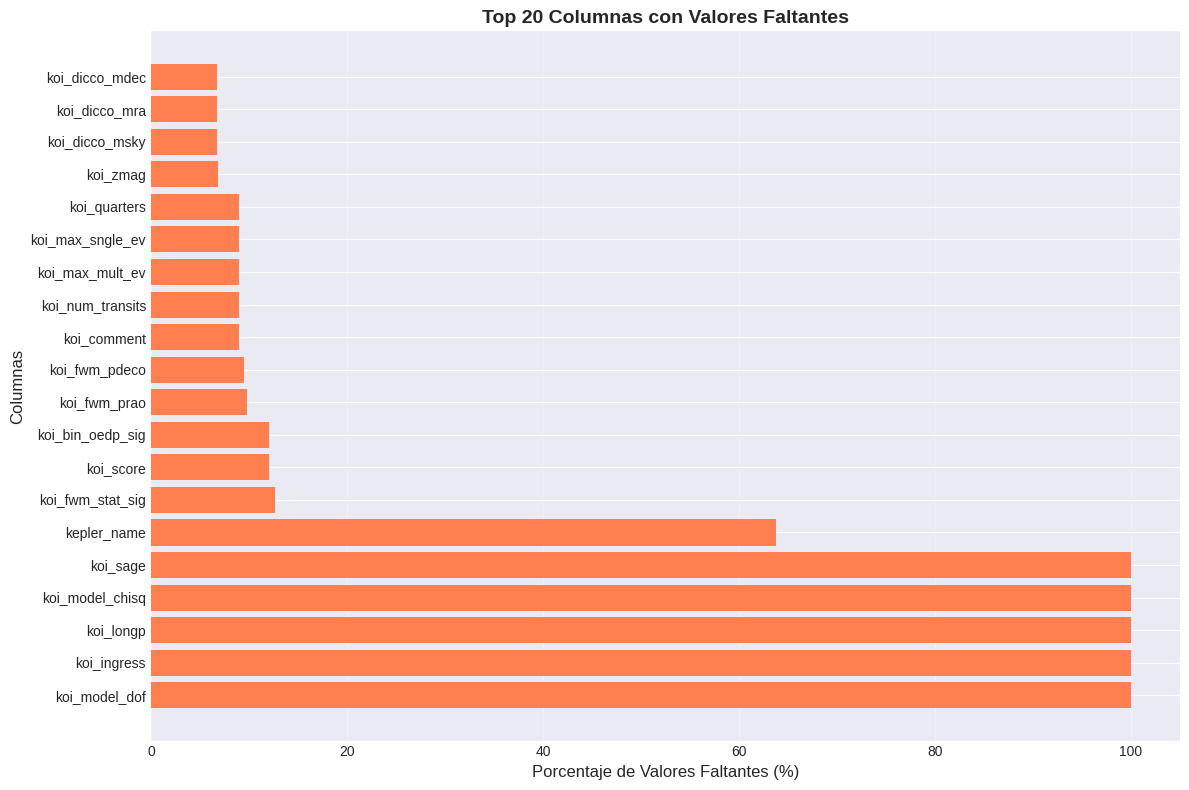

In [12]:
# Visualización de valores faltantes
plt.figure(figsize=(12, 8))
top_missing = missing_df[missing_df['Porcentaje_Faltante'] > 0]. head(20)
plt.barh(top_missing['Columna'], top_missing['Porcentaje_Faltante'], color='coral')
plt.xlabel('Porcentaje de Valores Faltantes (%)', fontsize=12)
plt.ylabel('Columnas', fontsize=12)
plt.title('Top 20 Columnas con Valores Faltantes', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 4.3 Relevant Feature Selection


In [13]:
# Seleccionar columnas con menos del 30% de valores faltantes
columns_to_keep = missing_df[missing_df['Porcentaje_Faltante'] < 30]['Columna'].tolist()

# Features importantes del dataset de exoplanetas
important_features = [
    'koi_period',
    'koi_time0bk',
    'koi_impact',
    'koi_duration',
    'koi_depth',
    'koi_prad',
    'koi_teq',
    'koi_insol',
    'koi_model_snr',
    'koi_steff',
    'koi_slogg',
    'koi_srad',
    'ra',
    'dec',
    'koi_kepmag'
]

# Filtrar features que existan y tengan pocos valores faltantes
selected_features = [f for f in important_features if f in columns_to_keep]

# Crear dataset con features seleccionadas
df_clean = df[selected_features + [target_col]].copy()

print(f"\n✓ Features seleccionadas: {len(selected_features)}")
print(f"\n Lista de features:")
for i, feat in enumerate(selected_features, 1):
    print(f"   {i}. {feat}")


✓ Features seleccionadas: 15

 Lista de features:
   1. koi_period
   2. koi_time0bk
   3. koi_impact
   4. koi_duration
   5. koi_depth
   6. koi_prad
   7. koi_teq
   8. koi_insol
   9. koi_model_snr
   10. koi_steff
   11. koi_slogg
   12. koi_srad
   13. ra
   14. dec
   15. koi_kepmag


### 4.4 Handling Missing Values


In [14]:
# Verificar valores faltantes
print("\n Valores faltantes en dataset limpio:\n")
print(df_clean. isnull().sum())

# Eliminar filas con valores faltantes
df_clean = df_clean.dropna()

print(f"\n✓ Dataset después de eliminar valores faltantes:")
print(f"   • Forma: {df_clean.shape}")
print(f"   • Distribución de clases:")
print(df_clean[target_col].value_counts())


 Valores faltantes en dataset limpio:

koi_period           0
koi_time0bk          0
koi_impact         259
koi_duration         0
koi_depth          259
koi_prad           259
koi_teq            259
koi_insol          219
koi_model_snr      259
koi_steff          259
koi_slogg          259
koi_srad           259
ra                   0
dec                  0
koi_kepmag           1
koi_disposition      0
dtype: int64

✓ Dataset después de eliminar valores faltantes:
   • Forma: (7325, 16)
   • Distribución de clases:
koi_disposition
FALSE POSITIVE    4581
CONFIRMED         2744
Name: count, dtype: int64


## **5. EXPLORATORY DATA ANALYSIS (EDA)**

### 5.1 Correlation Matrix


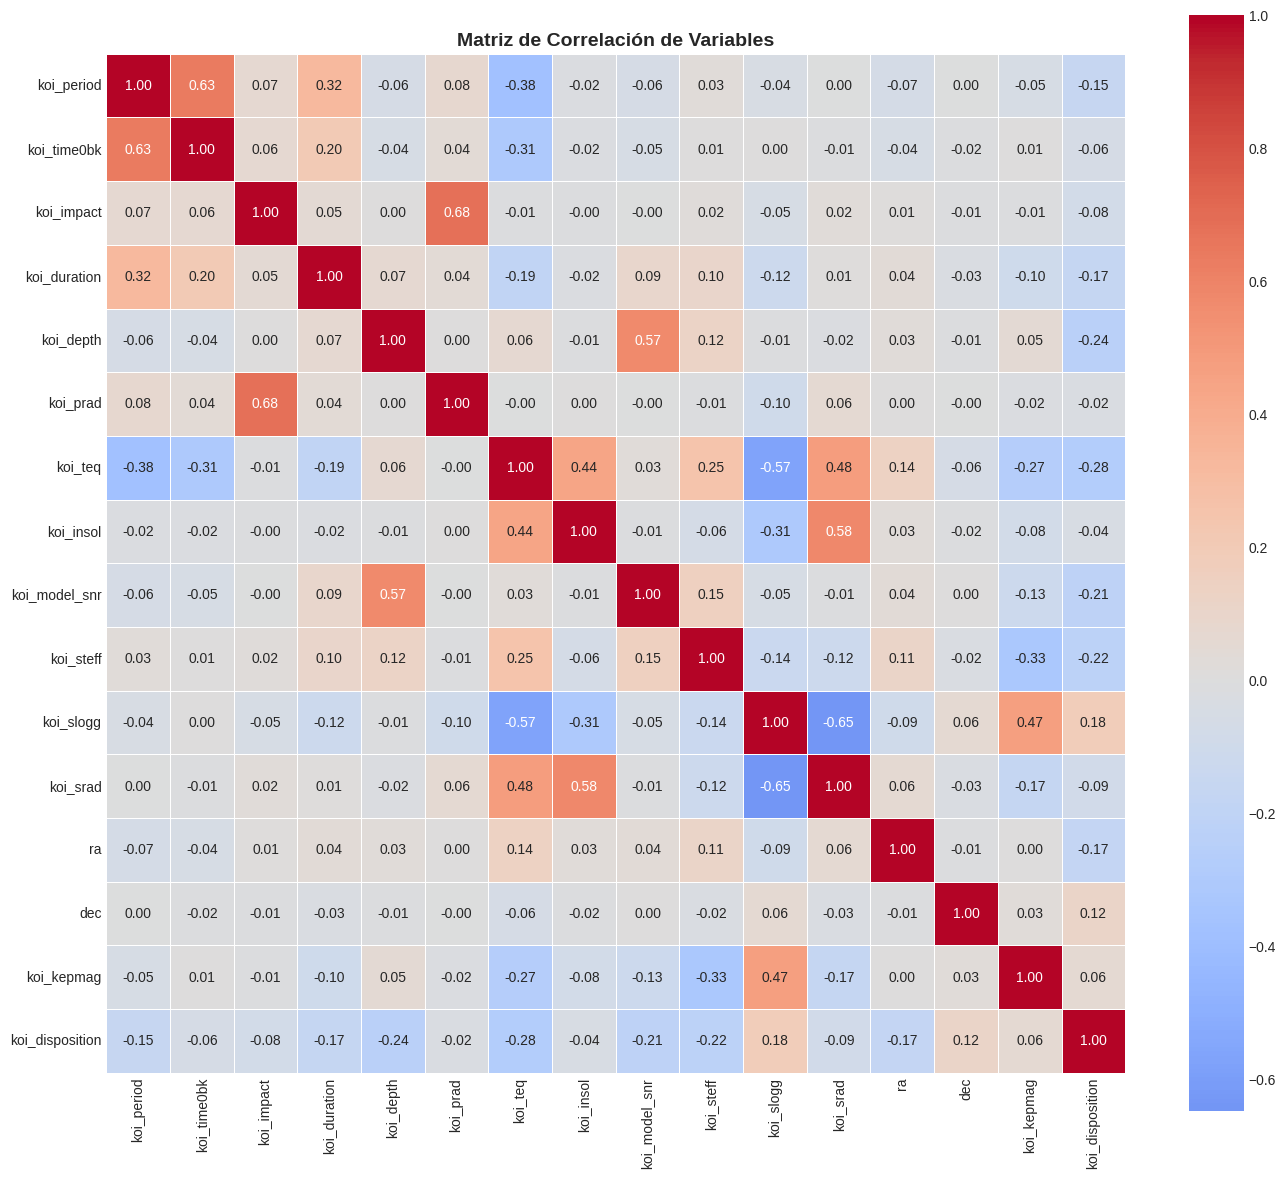

In [15]:
# Crear copia numérica para correlación
df_numeric = df_clean.copy()
df_numeric[target_col] = (df_numeric[target_col] == 'CONFIRMED').astype(int)

# Calcular matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5)
plt.title('Matriz de Correlación de Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

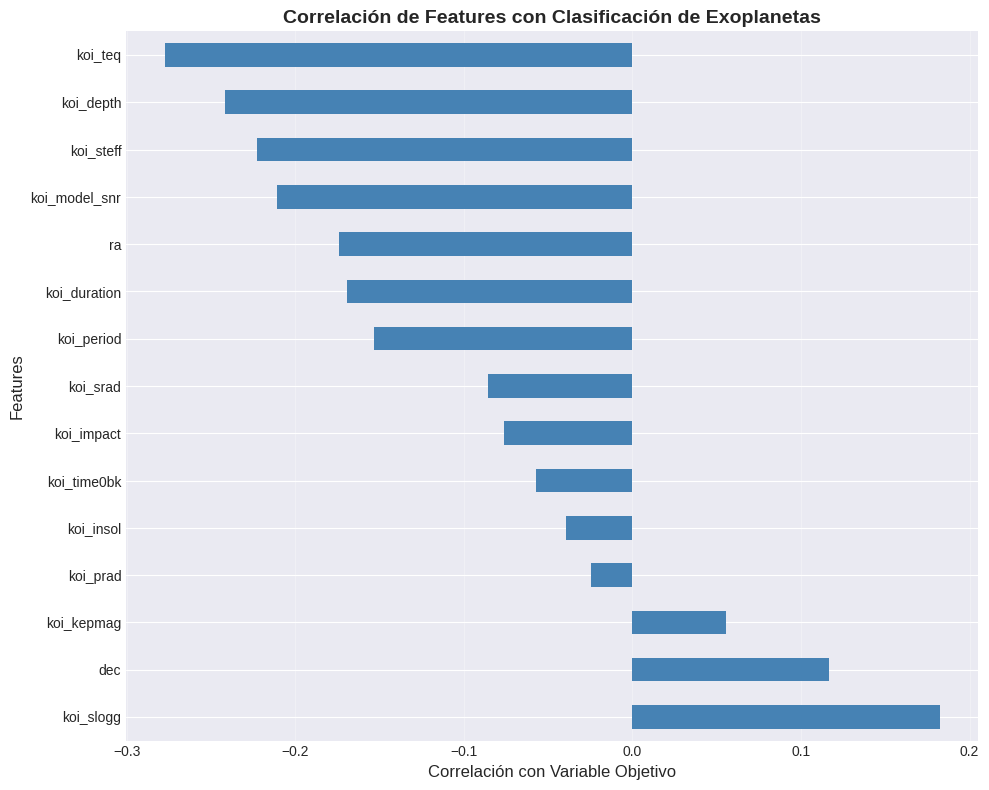


 Features más correlacionadas con la variable objetivo:

koi_slogg       0.182287
dec             0.116702
koi_kepmag      0.055362
koi_prad       -0.024655
koi_insol      -0.039142
koi_time0bk    -0.057199
koi_impact     -0.076299
koi_srad       -0.085417
koi_period     -0.153318
koi_duration   -0.169324
Name: koi_disposition, dtype: float64


In [16]:
# Correlación con la variable objetivo
target_correlation = correlation_matrix[target_col].drop(target_col). sort_values(ascending=False)

plt.figure(figsize=(10, 8))
target_correlation.plot(kind='barh', color='steelblue')
plt. xlabel('Correlación con Variable Objetivo', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Correlación de Features con Clasificación de Exoplanetas',
          fontsize=14, fontweight='bold')
plt. grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n Features más correlacionadas con la variable objetivo:\n")
print(target_correlation.head(10))

### 5.2 Variable Distribution by Class


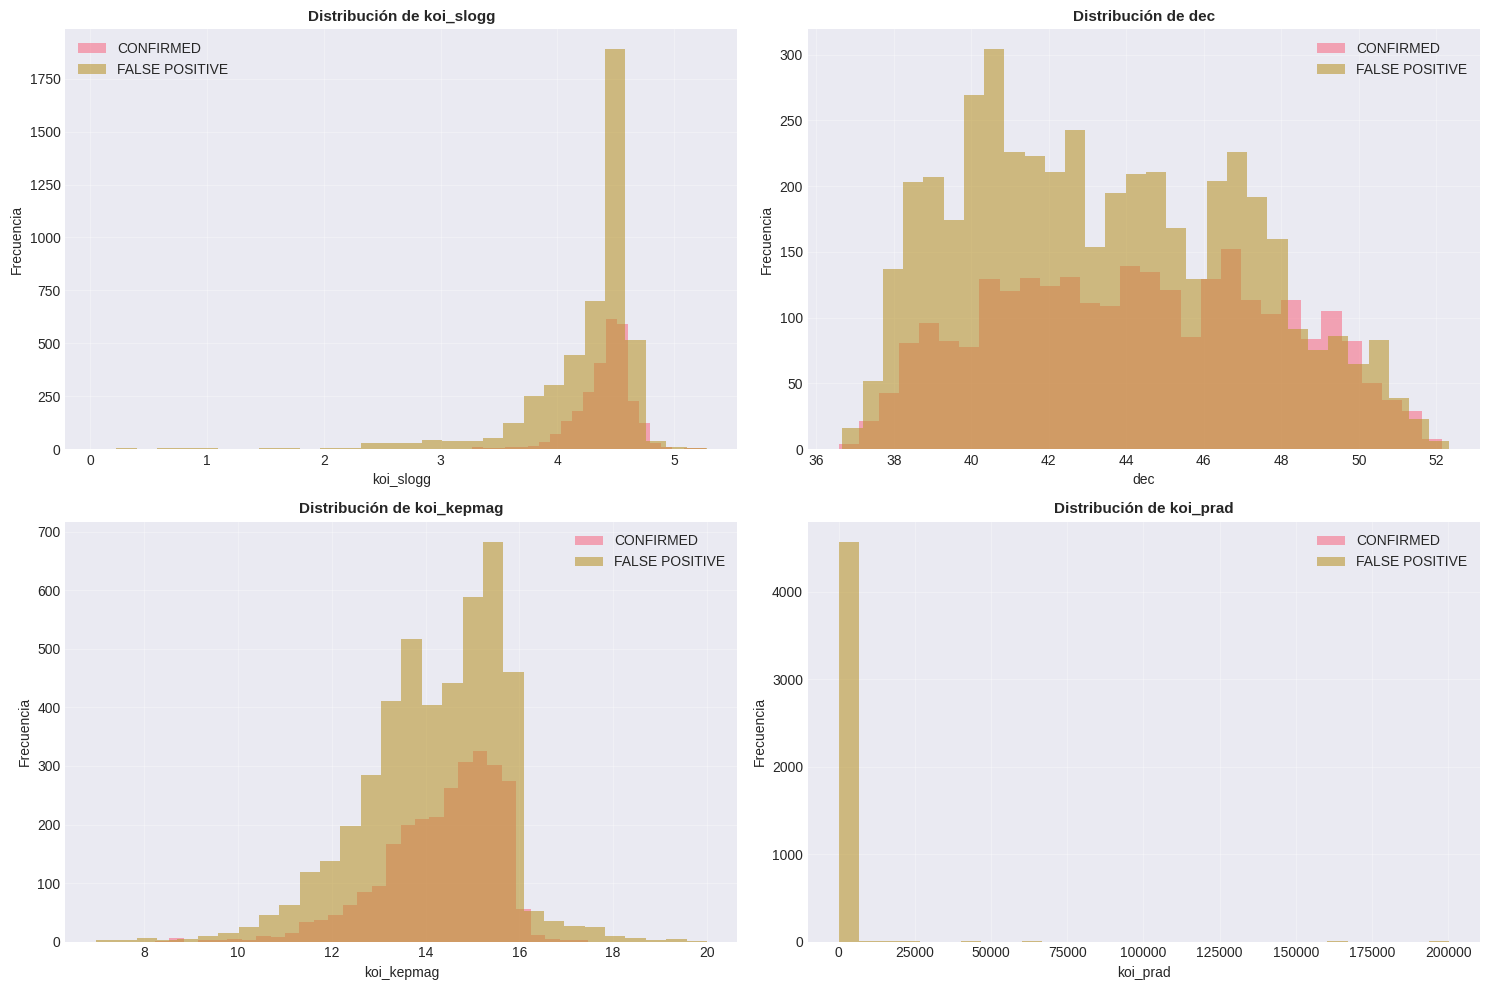

In [17]:
# Seleccionar las 4 features más importantes
top_features = target_correlation.abs().head(4).index.tolist()

# Visualizar distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    for disposition in df_clean[target_col].unique():
        subset = df_clean[df_clean[target_col] == disposition][feature]
        axes[idx].hist(subset, alpha=0.6, label=disposition, bins=30)

    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frecuencia', fontsize=10)
    axes[idx].set_title(f'Distribución de {feature}', fontsize=11, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## **6. VARIABLE DESCRIPTION TABLE**

In [18]:
# Crear tabla descriptiva de variables
variable_descriptions = [
    {'ID': 1, 'Variable': 'koi_period', 'Descripción': 'Período orbital del planeta en días', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 2, 'Variable': 'koi_time0bk', 'Descripción': 'Época de tránsito', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 3, 'Variable': 'koi_impact', 'Descripción': 'Parámetro de impacto del tránsito', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 4, 'Variable': 'koi_duration', 'Descripción': 'Duración del tránsito en horas', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 5, 'Variable': 'koi_depth', 'Descripción': 'Profundidad del tránsito', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 6, 'Variable': 'koi_prad', 'Descripción': 'Radio planetario en radios terrestres', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 7, 'Variable': 'koi_teq', 'Descripción': 'Temperatura de equilibrio del planeta (K)', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 8, 'Variable': 'koi_insol', 'Descripción': 'Insolación (flujo estelar recibido)', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 9, 'Variable': 'koi_model_snr', 'Descripción': 'Relación señal-ruido del modelo', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 10, 'Variable': 'koi_steff', 'Descripción': 'Temperatura efectiva de la estrella (K)', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 11, 'Variable': 'koi_slogg', 'Descripción': 'Logaritmo de la gravedad superficial estelar', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 12, 'Variable': 'koi_srad', 'Descripción': 'Radio estelar en radios solares', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 13, 'Variable': 'ra', 'Descripción': 'Ascensión recta (coordenada celeste)', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 14, 'Variable': 'dec', 'Descripción': 'Declinación (coordenada celeste)', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 15, 'Variable': 'koi_kepmag', 'Descripción': 'Magnitud Kepler (brillo aparente)', 'Tipo': 'Numérica Continua', 'Técnica de Transformación': 'Estandarización (StandardScaler)'},
    {'ID': 16, 'Variable': target_col, 'Descripción': 'Clasificación del objeto', 'Tipo': 'Categórica Binaria', 'Técnica de Transformación': 'Label Encoding (1: CONFIRMED, 0: FALSE POSITIVE)'}
]

df_variables = pd.DataFrame(variable_descriptions)

print("\n" + "="*100)
print("TABLA 1: DESCRIPCIÓN DE VARIABLES Y TÉCNICAS DE TRANSFORMACIÓN")
print("="*100 + "\n")
display(df_variables)

df_variables.to_csv('tabla_descripcion_variables.csv', index=False)
print("\n✓ Tabla guardada como 'tabla_descripcion_variables.csv'")


TABLA 1: DESCRIPCIÓN DE VARIABLES Y TÉCNICAS DE TRANSFORMACIÓN



,ID,Variable,Descripción,Tipo,Técnica de Transformación
0,1,koi_period,Período orbital del planeta en días,Numérica Continua,Estandarización (StandardScaler)
1,2,koi_time0bk,Época de tránsito,Numérica Continua,Estandarización (StandardScaler)
2,3,koi_impact,Parámetro de impacto del tránsito,Numérica Continua,Estandarización (StandardScaler)
3,4,koi_duration,Duración del tránsito en horas,Numérica Continua,Estandarización (StandardScaler)
4,5,koi_depth,Profundidad del tránsito,Numérica Continua,Estandarización (StandardScaler)
5,6,koi_prad,Radio planetario en radios terrestres,Numérica Continua,Estandarización (StandardScaler)
6,7,koi_teq,Temperatura de equilibrio del planeta (K),Numérica Continua,Estandarización (StandardScaler)
7,8,koi_insol,Insolación (flujo estelar recibido),Numérica Continua,Estandarización (StandardScaler)
8,9,koi_model_snr,Relación señal-ruido del modelo,Numérica Continua,Estandarización (StandardScaler)
9,10,koi_steff,Temperatura efectiva de la estrella (K),Numérica Continua,Estandarización (StandardScaler)



✓ Tabla guardada como 'tabla_descripcion_variables.csv'


###Justification of StandardScaler
**Why StandardScaler?**
1. **Removes scale biases**: Variables have different units and ranges
2. **Improves training**: Neural networks are sensitive to scale
3. **Robust to outliers**: Better preserves the original distribution



## **7. DATA PREPARATION FOR MODELING**

In [19]:
# Separar features y target
X = df_clean[selected_features]. copy()
y = df_clean[target_col].copy()

print(f" Dimensiones:")
print(f"   • X: {X.shape}")
print(f"   • y: {y. shape}")

 Dimensiones:
   • X: (7325, 15)
   • y: (7325,)


In [20]:
# Codificar variable objetivo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("\n Mapeo de codificación:")
for i, label in enumerate(label_encoder.classes_):
    print(f"   • {label} → {i}")


 Mapeo de codificación:
   • CONFIRMED → 0
   • FALSE POSITIVE → 1


In [21]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\n División de datos:")
print(f"   • Entrenamiento: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"   • Prueba: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")


 División de datos:
   • Entrenamiento: 5860 (80.0%)
   • Prueba: 1465 (20.0%)


In [22]:
# Normalización
scaler = StandardScaler()
X_train_scaled = scaler. fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Normalización completada")
print(f"   • Media (train): {X_train_scaled.mean():.6f}")  #  Sin espacio antes del 6
print(f"   • Desv. Est. (train): {X_train_scaled. std():.6f}")

print(f"\n✓ Formas finales:")
print(f"   • X_train_scaled: {X_train_scaled.shape}")
print(f"   • X_test_scaled: {X_test_scaled.shape}")
print(f"   • y_train: {y_train. shape}")
print(f"   • y_test: {y_test.shape}")


✓ Normalización completada
   • Media (train): -0.000000
   • Desv. Est. (train): 1.000000

✓ Formas finales:
   • X_train_scaled: (5860, 15)
   • X_test_scaled: (1465, 15)
   • y_train: (5860,)
   • y_test: (1465,)


## **8. BASE MODEL**

### Architecture:
- **L1**: 4 neurons, sigmoid activation
- **L2**: 1 neuron, sigmoid activation
- **Epochs**: 10
- **Batch size**: 64
- **Optimizer**: RMSprop

In [23]:
def crear_modelo_base(input_dim):
    modelo = Sequential([
        Dense(4, activation='sigmoid', input_dim=input_dim, name='capa_oculta_L1'),
        Dense(1, activation='sigmoid', name='capa_salida_L2')
    ])
    return modelo

modelo_base = crear_modelo_base(input_dim=X_train_scaled.shape[1])

modelo_base.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

print("\n" + "="*70)
print("ARQUITECTURA DEL MODELO BASE")
print("="*70 + "\n")
modelo_base.summary()


ARQUITECTURA DEL MODELO BASE



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta_L1 (Dense)          │ (None, 4)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida_L2 (Dense)          │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69 (276.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
print("\n Entrenando modelo base...\n")

history_base = modelo_base.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

print("\n✓ Entrenamiento completado")


 Entrenando modelo base...

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - Precision: 0.6225 - Recall: 0.9668 - accuracy: 0.6104 - loss: 0.6619 - val_Precision: 0.6129 - val_Recall: 0.9875 - val_accuracy: 0.6092 - val_loss: 0.6530
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.6279 - Recall: 0.9925 - accuracy: 0.6253 - loss: 0.6388 - val_Precision: 0.6168 - val_Recall: 0.9903 - val_accuracy: 0.6160 - val_loss: 0.6360
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.6324 - Recall: 0.9910 - accuracy: 0.6320 - loss: 0.6203 - val_Precision: 0.6268 - val_Recall: 0.9819 - val_accuracy: 0.6297 - val_loss: 0.6207
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.6411 - Recall: 0.9763 - accuracy: 0.6411 - loss: 0.6035 - val_Precision: 0.6386 - val_Recall: 0.9569 - val_accuracy: 0.6408 - val_loss: 0.6065
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.6609 - Recall: 0.9552 - accuracy: 0.6634 - loss: 0.5881 - val_Precision: 0

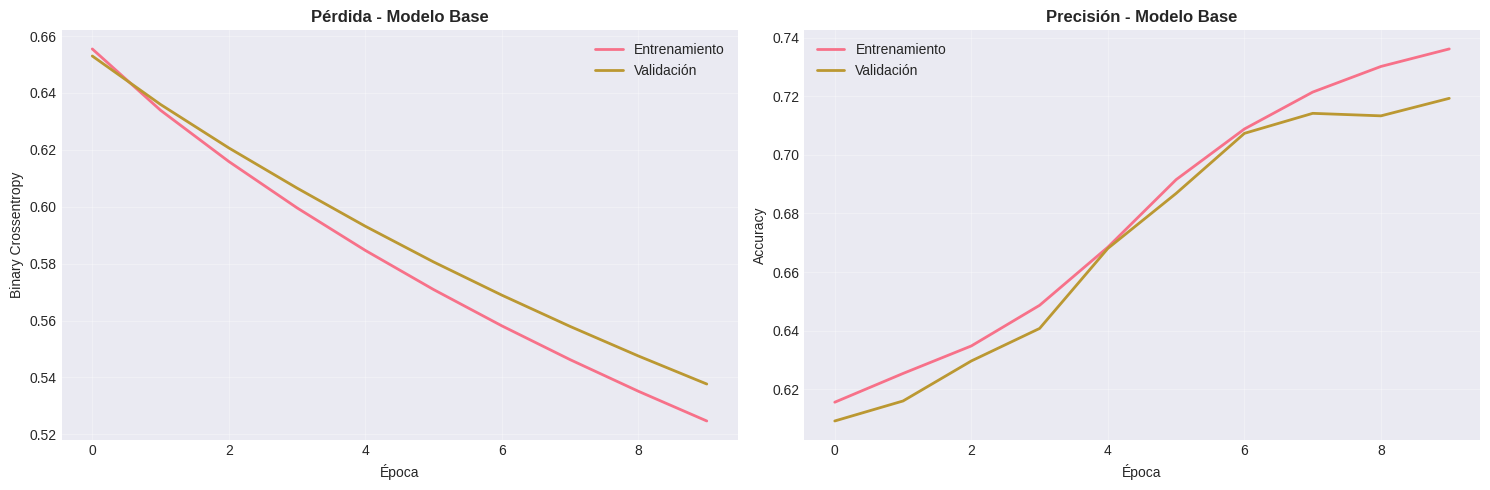

In [25]:
# Visualizar entrenamiento
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0]. plot(history_base.history['loss'], label='Entrenamiento', linewidth=2)
axes[0].plot(history_base.history['val_loss'], label='Validación', linewidth=2)
axes[0].set_title('Pérdida - Modelo Base', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Binary Crossentropy')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1]. plot(history_base.history['accuracy'], label='Entrenamiento', linewidth=2)
axes[1].plot(history_base.history['val_accuracy'], label='Validación', linewidth=2)
axes[1].set_title('Precisión - Modelo Base', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [26]:
# Evaluación
y_pred_base_prob = modelo_base.predict(X_test_scaled)
y_pred_base = (y_pred_base_prob > 0.5).astype(int). flatten()

accuracy_base = accuracy_score(y_test, y_pred_base)
precision_base = precision_score(y_test, y_pred_base)
recall_base = recall_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base)

print("\n" + "="*70)
print("EVALUACIÓN DEL MODELO BASE")
print("="*70 + "\n")
print(f"   • Accuracy:  {accuracy_base:.4f} ({accuracy_base*100:.2f}%)")
print(f"   • Precision: {precision_base:.4f} ({precision_base*100:.2f}%)")
print(f"   • Recall:    {recall_base:.4f} ({recall_base*100:.2f}%)")
print(f"   • F1-Score:  {f1_base:.4f} ({f1_base*100:.2f}%)")

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred_base, target_names=['FALSE POSITIVE', 'CONFIRMED']))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

EVALUACIÓN DEL MODELO BASE

   • Accuracy:  0.7604 (76.04%)
   • Precision: 0.7817 (78.17%)
   • Recall:    0.8559 (85.59%)
   • F1-Score:  0.8171 (81.71%)

 Classification Report:

                precision    recall  f1-score   support

FALSE POSITIVE       0.71      0.60      0.65       549
     CONFIRMED       0.78      0.86      0.82       916

      accuracy                           0.76      1465
     macro avg       0.75      0.73      0.73      1465
  weighted avg       0.76      0.76      0.76      1465



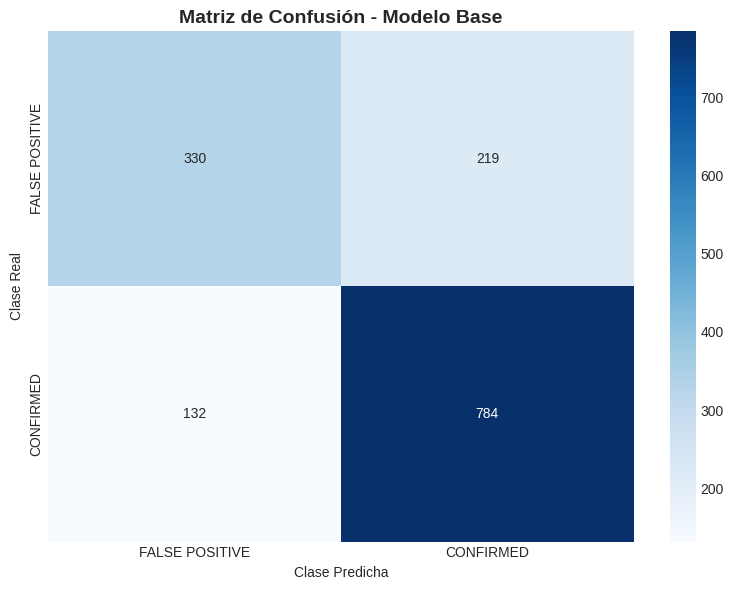

In [27]:
# Matriz de confusión
cm_base = confusion_matrix(y_test, y_pred_base)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=['FALSE POSITIVE', 'CONFIRMED'],
            yticklabels=['FALSE POSITIVE', 'CONFIRMED'])
plt. title('Matriz de Confusión - Modelo Base', fontsize=14, fontweight='bold')
plt. ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.tight_layout()
plt.show()

In [28]:
# Registrar modelo base en MLflow
with mlflow.start_run(run_name="Modelo_Base"):
    # Registrar parámetros
    mlflow.log_param("capas", "4,1")
    mlflow.log_param("activaciones", "sigmoid,sigmoid")
    mlflow.log_param("epochs", 10)
    mlflow.log_param("batch_size", 64)
    mlflow.log_param("optimizer", "RMSprop")
    mlflow.log_param("learning_rate", 0.001)
    mlflow.log_param("dropout", "No")

    # Registrar métricas
    mlflow.log_metric("accuracy", accuracy_base)
    mlflow.log_metric("precision", precision_base)
    mlflow.log_metric("recall", recall_base)
    mlflow.log_metric("f1_score", f1_base)

    # Registrar métricas de entrenamiento por época
    for epoch, (loss, val_loss, acc, val_acc) in enumerate(zip(
        history_base.history['loss'],
        history_base. history['val_loss'],
        history_base.history['accuracy'],
        history_base.history['val_accuracy']
    )):
        mlflow.log_metric("train_loss", loss, step=epoch)
        mlflow.log_metric("val_loss", val_loss, step=epoch)
        mlflow.log_metric("train_accuracy", acc, step=epoch)
        mlflow.log_metric("val_accuracy", val_acc, step=epoch)

    # Registrar el modelo
    mlflow.keras.log_model(modelo_base, "modelo")

    # Registrar matriz de confusión como artefacto
    fig_cm = plt.figure(figsize=(8, 6))
    sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues',
                xticklabels=['FALSE POSITIVE', 'CONFIRMED'],
                yticklabels=['FALSE POSITIVE', 'CONFIRMED'])
    plt.title('Matriz de Confusión - Modelo Base')
    plt.ylabel('Clase Real')
    plt.xlabel('Clase Predicha')
    plt.tight_layout()
    mlflow.log_figure(fig_cm, "confusion_matrix.png")
    plt.close()

    print("✓ Modelo Base registrado en MLflow")

2025/12/15 19:36:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 19:36:13 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


✓ Modelo Base registrado en MLflow


## **9.  MODEL OPTIMIZATION - FINE TUNING**

In [29]:
def crear_modelo_optimizado(config):
    modelo = Sequential()

    modelo.add(Dense(
        config['layers'][0],
        activation=config['activations'][0],
        input_dim=config['input_dim'],
        name=f'L1_{config["layers"][0]}n'
    ))
    if config['dropout_rates'][0] > 0:
        modelo.add(Dropout(config['dropout_rates'][0]))

    for i in range(1, len(config['layers'])-1):
        modelo.add(Dense(
            config['layers'][i],
            activation=config['activations'][i],
            name=f'L{i+1}_{config["layers"][i]}n'
        ))
        if config['dropout_rates'][i] > 0:
            modelo. add(Dropout(config['dropout_rates'][i]))

    modelo.add(Dense(
        config['layers'][-1],
        activation=config['activations'][-1],
        name='capa_salida'
    ))

    return modelo

In [30]:
# Configuraciones a probar
configuraciones = [
    {
        'nombre': 'Modelo_1: Todas las capas con Sigmoid',
        'layers': [16, 8, 1],
        'activations': ['sigmoid', 'sigmoid', 'sigmoid'],  # ← TODAS SIGMOID
        'dropout_rates': [0.2, 0.2, 0],
        'input_dim': X_train_scaled.shape[1],
        'optimizer': RMSprop(learning_rate=0.001),
        'epochs': 50,
        'batch_size': 64
    },
    {
        'nombre': 'Modelo_2: Arquitectura profunda con ReLU',
        'layers': [32, 16, 8, 1],
        'activations': ['relu', 'relu', 'relu', 'sigmoid'],
        'dropout_rates': [0.3, 0.3, 0.2, 0],
        'input_dim': X_train_scaled.shape[1],
        'optimizer': Adam(learning_rate=0.0005),
        'epochs': 75,
        'batch_size': 32
    },
    {
        'nombre': 'Modelo_3: RMSprop optimizado con ReLU',
        'layers': [16, 8, 1],
        'activations': ['relu', 'relu', 'sigmoid'],
        'dropout_rates': [0.25, 0.25, 0],
        'input_dim': X_train_scaled.shape[1],
        'optimizer': RMSprop(learning_rate=0.0005),
        'epochs': 50,
        'batch_size': 64
    }
]

print(f"✓ {len(configuraciones)} configuraciones definidas para optimización")

✓ 3 configuraciones definidas para optimización


In [31]:
# Entrenar modelos optimizados CON MLFLOW
modelos_optimizados = []
historiales = []
resultados = []

for i, config in enumerate(configuraciones, 1):
    print(f"\n{'='*70}")
    print(f"Entrenando {config['nombre']}")
    print(f"{'='*70}\n")

    # Iniciar run de MLflow
    with mlflow. start_run(run_name=config['nombre']):
        # Registrar parámetros
        mlflow.log_param("capas", str(config['layers']))
        mlflow.log_param("activaciones", str(config['activations']))
        mlflow.log_param("dropout_rates", str(config['dropout_rates']))
        mlflow.log_param("epochs", config['epochs'])
        mlflow.log_param("batch_size", config['batch_size'])
        mlflow.log_param("optimizer", type(config['optimizer']).__name__)
        mlflow.log_param("learning_rate", config['optimizer']. learning_rate. numpy())

        # Crear y compilar modelo
        modelo = crear_modelo_optimizado(config)
        modelo.compile(
            optimizer=config['optimizer'],
            loss='binary_crossentropy',
            metrics=['accuracy', 'Precision', 'Recall']
        )

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Entrenar
        history = modelo.fit(
            X_train_scaled, y_train,
            epochs=config['epochs'],
            batch_size=config['batch_size'],
            validation_split=0.2,
            callbacks=[early_stop],
            verbose=1
        )

        # Predicciones
        y_pred_prob = modelo.predict(X_test_scaled, verbose=0)
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()

        # Calcular métricas
        resultado = {
            'Modelo': config['nombre'],
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1-Score': f1_score(y_test, y_pred)
        }

        # Registrar métricas finales
        mlflow.log_metric("accuracy", resultado['Accuracy'])
        mlflow.log_metric("precision", resultado['Precision'])
        mlflow.log_metric("recall", resultado['Recall'])
        mlflow.log_metric("f1_score", resultado['F1-Score'])
        mlflow.log_metric("epochs_trained", len(history.history['loss']))

        # Registrar métricas de entrenamiento por época
        for epoch, (loss, val_loss, acc, val_acc) in enumerate(zip(
            history.history['loss'],
            history.history['val_loss'],
            history.history['accuracy'],
            history.history['val_accuracy']
        )):
            mlflow.log_metric("train_loss", loss, step=epoch)
            mlflow.log_metric("val_loss", val_loss, step=epoch)
            mlflow.log_metric("train_accuracy", acc, step=epoch)
            mlflow.log_metric("val_accuracy", val_acc, step=epoch)

        # Registrar el modelo
        mlflow.keras. log_model(modelo, "modelo")

        # Crear y registrar matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        fig_cm = plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['FALSE POSITIVE', 'CONFIRMED'],
                    yticklabels=['FALSE POSITIVE', 'CONFIRMED'])
        plt.title(f'Matriz de Confusión - {config["nombre"]}')
        plt.ylabel('Clase Real')
        plt.xlabel('Clase Predicha')
        plt.tight_layout()
        mlflow.log_figure(fig_cm, "confusion_matrix.png")
        plt.close()

        # Crear y registrar gráficas de entrenamiento
        fig_history = plt.figure(figsize=(15, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Entrenamiento', linewidth=2)
        plt.plot(history.history['val_loss'], label='Validación', linewidth=2)
        plt.title('Pérdida durante entrenamiento')
        plt.xlabel('Época')
        plt.ylabel('Binary Crossentropy')
        plt.legend()
        plt.grid(alpha=0.3)

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Entrenamiento', linewidth=2)
        plt.plot(history. history['val_accuracy'], label='Validación', linewidth=2)
        plt.title('Precisión durante entrenamiento')
        plt.xlabel('Época')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(alpha=0.3)

        plt.tight_layout()
        mlflow.log_figure(fig_history, "training_history.png")
        plt.close()

        # Guardar
        modelos_optimizados.append(modelo)
        historiales.append(history)
        resultados. append(resultado)

        print(f"\n✓ {config['nombre']} completado y registrado en MLflow")
        print(f"   Accuracy: {resultado['Accuracy']:.4f}")


Entrenando Modelo_1: Todas las capas con Sigmoid

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - Precision: 0.6510 - Recall: 0.7260 - accuracy: 0.5820 - loss: 0.6775 - val_Precision: 0.6143 - val_Recall: 1.0000 - val_accuracy: 0.6143 - val_loss: 0.6459
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - Precision: 0.6425 - Recall: 0.8798 - accuracy: 0.6165 - loss: 0.6451 - val_Precision: 0.6143 - val_Recall: 1.0000 - val_accuracy: 0.6143 - val_loss: 0.6273
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Precision: 0.6511 - Recall: 0.9146 - accuracy: 0.6379 - loss: 0.6341 - val_Precision: 0.6168 - val_Recall: 0.9972 - val_accuracy: 0.6177 - val_loss: 0.6084
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Precision: 0.6657 - Recall: 0.9119 - accuracy: 0.6566 - loss: 0.6079 - val_Precision: 0.6375 - val_Recall: 0.9722 - val_accuracy: 0.6433 - val_loss: 0.5875
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.6735 - Recall: 0.9048 - accuracy: 0.6639 - loss: 0.

2025/12/15 19:36:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 19:36:58 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.



✓ Modelo_1: Todas las capas con Sigmoid completado y registrado en MLflow
   Accuracy: 0.8628

Entrenando Modelo_2: Arquitectura profunda con ReLU

Epoch 1/75
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Precision: 0.6422 - Recall: 0.7742 - accuracy: 0.5872 - loss: 0.6557 - val_Precision: 0.6143 - val_Recall: 1.0000 - val_accuracy: 0.6143 - val_loss: 0.5935
Epoch 2/75
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.6349 - Recall: 0.9325 - accuracy: 0.6206 - loss: 0.5966 - val_Precision: 0.6305 - val_Recall: 0.9931 - val_accuracy: 0.6382 - val_loss: 0.5465
Epoch 3/75
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.6578 - Recall: 0.9470 - accuracy: 0.6570 - loss: 0.5574 - val_Precision: 0.7316 - val_Recall: 0.9125 - val_accuracy: 0.7406 - val_loss: 0.5128
Epoch 4/75
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7238 - Recall: 0.8976 - accuracy: 0.7201 - loss: 0.5148 - val_Precision: 0.7853 - val_Recall: 0.8736 - val_accuracy: 0.7756 - val_loss: 0.4811
Epoch 5/75


2025/12/15 19:37:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 19:37:51 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.



✓ Modelo_2: Arquitectura profunda con ReLU completado y registrado en MLflow
   Accuracy: 0.8901

Entrenando Modelo_3: RMSprop optimizado con ReLU

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - Precision: 0.6315 - Recall: 0.5147 - accuracy: 0.5074 - loss: 0.7386 - val_Precision: 0.6580 - val_Recall: 0.7028 - val_accuracy: 0.5930 - val_loss: 0.6577
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Precision: 0.6616 - Recall: 0.7046 - accuracy: 0.5876 - loss: 0.6641 - val_Precision: 0.6635 - val_Recall: 0.8681 - val_accuracy: 0.6485 - val_loss: 0.6085
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Precision: 0.6731 - Recall: 0.8031 - accuracy: 0.6310 - loss: 0.6246 - val_Precision: 0.6726 - val_Recall: 0.8958 - val_accuracy: 0.6681 - val_loss: 0.5736
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Precision: 0.6826 - Recall: 0.8404 - accuracy: 0.6538 - loss: 0.5768 - val_Precision: 0.7015 - val_Recall: 0.8681 - val_accuracy: 0.6920 - val_loss: 0.5485
Epoch 5/50
74/74 ━

2025/12/15 19:38:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/15 19:38:22 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.



✓ Modelo_3: RMSprop optimizado con ReLU completado y registrado en MLflow
   Accuracy: 0.8724


## **10. MODEL COMPARISON**

In [32]:
# Agregar modelo base a resultados
resultados_completos = [{
    'Modelo': 'Modelo Base',
    'Accuracy': accuracy_base,
    'Precision': precision_base,
    'Recall': recall_base,
    'F1-Score': f1_base
}] + resultados

df_resultados = pd.DataFrame(resultados_completos)

print("\n" + "="*100)
print("TABLA COMPARATIVA DE MODELOS")
print("="*100 + "\n")
display(df_resultados)

# Identificar mejor modelo
mejor_idx = df_resultados['F1-Score'].idxmax()
mejor_modelo = df_resultados.loc[mejor_idx, 'Modelo']
print(f"\n🏆 Mejor modelo: {mejor_modelo} (F1-Score: {df_resultados.loc[mejor_idx, 'F1-Score']:.4f})")


TABLA COMPARATIVA DE MODELOS



,Modelo,Accuracy,Precision,Recall,F1-Score
0,Modelo Base,0.760410,0.781655,0.855895,0.817092
1,Modelo_1: Todas las capas con Sigmoid,0.862799,0.927121,0.847162,0.885339
2,Modelo_2: Arquitectura profunda con ReLU,0.890102,0.901169,0.925764,0.913301
3,Modelo_3: RMSprop optimizado con ReLU,0.872355,0.916571,0.875546,0.895589



🏆 Mejor modelo: Modelo_2: Arquitectura profunda con ReLU (F1-Score: 0.9133)


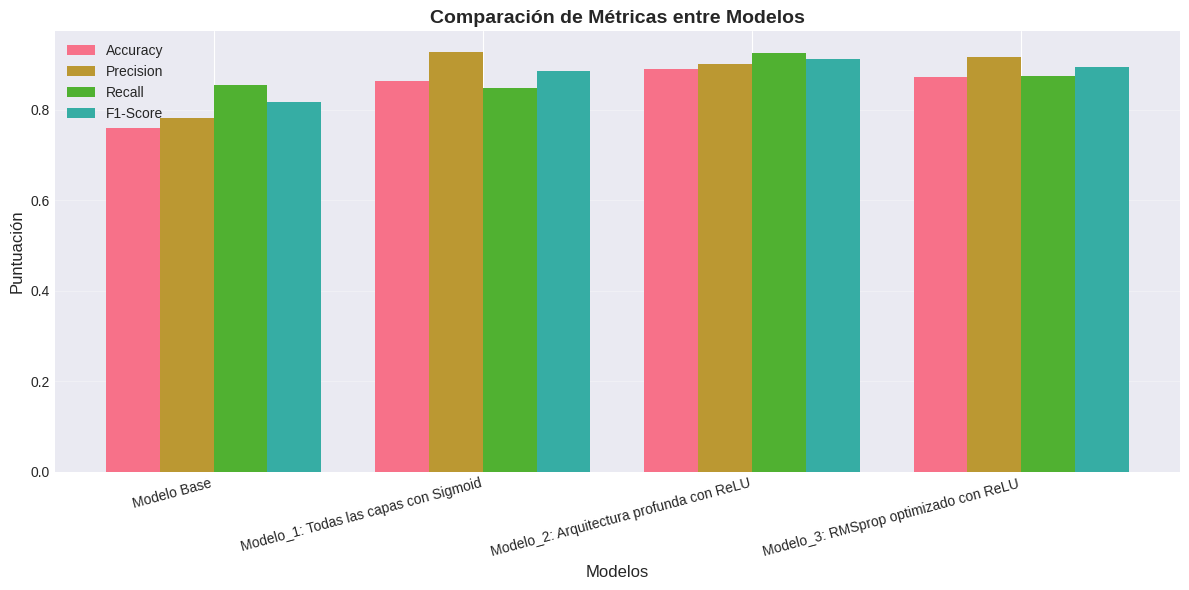

In [33]:
# Visualización comparativa
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(df_resultados))
width = 0.2

ax.bar(x - 1.5*width, df_resultados['Accuracy'], width, label='Accuracy')
ax. bar(x - 0.5*width, df_resultados['Precision'], width, label='Precision')
ax.bar(x + 0.5*width, df_resultados['Recall'], width, label='Recall')
ax. bar(x + 1.5*width, df_resultados['F1-Score'], width, label='F1-Score')

ax.set_xlabel('Modelos', fontsize=12)
ax.set_ylabel('Puntuación', fontsize=12)
ax.set_title('Comparación de Métricas entre Modelos', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_resultados['Modelo'], rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [34]:
# Visualizar todos los experimentos registrados
client = MlflowClient()
experiment = client.get_experiment_by_name("Clasificacion_Exoplanetas")

runs = client.search_runs(
    experiment_ids=[experiment.experiment_id],
    order_by=["metrics.f1_score DESC"]
)

print("\n" + "="*100)
print("RESUMEN DE EXPERIMENTOS MLFLOW")
print("="*100 + "\n")

resultados_mlflow = []
for run in runs:
    resultados_mlflow.append({
        'Run Name': run.data.tags.get('mlflow.runName', 'N/A'),
        'F1-Score': run.data. metrics.get('f1_score', 0),
        'Accuracy': run. data.metrics.get('accuracy', 0),
        'Precision': run.data.metrics.get('precision', 0),
        'Recall': run.data. metrics.get('recall', 0),
        'Run ID': run.info.run_id
    })

df_mlflow = pd.DataFrame(resultados_mlflow)
display(df_mlflow)

print(f"\n🏆 Mejor modelo según MLflow: {df_mlflow. iloc[0]['Run Name']}")
print(f"   Run ID: {df_mlflow. iloc[0]['Run ID']}")
print(f"   F1-Score: {df_mlflow.iloc[0]['F1-Score']:.4f}")


RESUMEN DE EXPERIMENTOS MLFLOW



,Run Name,F1-Score,Accuracy,Precision,Recall,Run ID
0,Modelo_2: Arquitectura profunda con ReLU,0.913301,0.890102,0.901169,0.925764,22eeb944d28147b4bab4bc6ca24a1221
1,Modelo_3: RMSprop optimizado con ReLU,0.895589,0.872355,0.916571,0.875546,3f8692d15326412284431e05ad24e6d7
2,Modelo_1: Todas las capas con Sigmoid,0.885339,0.862799,0.927121,0.847162,44b2393d0dea4f68b17b3f703a22eca5
3,Modelo_Base,0.817092,0.760410,0.781655,0.855895,3f984a92d8bb40f8ae36199d254e0cfd



🏆 Mejor modelo según MLflow: Modelo_2: Arquitectura profunda con ReLU
   Run ID: 22eeb944d28147b4bab4bc6ca24a1221
   F1-Score: 0.9133


In [35]:
# Cargar el mejor modelo desde MLflow
best_run_id = df_mlflow.iloc[0]['Run ID']
best_model_uri = f"runs:/{best_run_id}/modelo"

print(f"\nCargando mejor modelo desde MLflow...")
print(f"Run ID: {best_run_id}")

modelo_mlflow = mlflow.keras.load_model(best_model_uri)

print("✓ Modelo cargado exitosamente desde MLflow")

# Verificar que funciona
test_prediction = modelo_mlflow.predict(X_test_scaled[: 5], verbose=0)
print(f"\nPrueba de predicción (primeras 5 muestras):")
print(test_prediction. flatten())


Cargando mejor modelo desde MLflow...
Run ID: 22eeb944d28147b4bab4bc6ca24a1221


✓ Modelo cargado exitosamente desde MLflow

Prueba de predicción (primeras 5 muestras):
[0.5801912  0.7998714  0.09323537 0.76915437 0.9799495 ]


## **11. PREDICTION WITH NEW DATA**

In [36]:
# Crear datos sintéticos de prueba
nuevos_datos = pd.DataFrame({
    'koi_period': [10.5, 365.25, 88.0, 1.5, 225.0],
    'koi_time0bk': [131.5, 134.2, 133.1, 132.8, 135.0],
    'koi_impact': [0.2, 0.5, 0.1, 0.8, 0.3],
    'koi_duration': [3.5, 12.0, 2.1, 1.5, 8.0],
    'koi_depth': [100, 500, 50, 200, 350],
    'koi_prad': [1.2, 10.5, 0.8, 0.5, 6.0],
    'koi_teq': [300, 220, 450, 800, 280],
    'koi_insol': [1.5, 0.3, 5.0, 100.0, 0.8],
    'koi_model_snr': [25, 150, 10, 8, 80],
    'koi_steff': [5800, 5200, 6500, 5900, 5400],
    'koi_slogg': [4.5, 4.3, 4.6, 4.4, 4.2],
    'koi_srad': [1.0, 1.5, 0.9, 1.1, 1.3],
    'ra': [280.5, 290.3, 285.7, 295.1, 275.8],
    'dec': [40.2, 38.5, 42.1, 39.8, 41.3],
    'koi_kepmag': [12.5, 14.2, 11.8, 15.3, 13.1]
})

# Asegurar mismo orden de columnas
nuevos_datos = nuevos_datos[selected_features]

print("\n📊 Nuevos datos para predicción:")
display(nuevos_datos)


📊 Nuevos datos para predicción:


,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,10.50,131.5,0.2,3.5,100,1.2,300,1.5,25,5800,4.5,1.0,280.5,40.2,12.5
1,365.25,134.2,0.5,12.0,500,10.5,220,0.3,150,5200,4.3,1.5,290.3,38.5,14.2
2,88.00,133.1,0.1,2.1,50,0.8,450,5.0,10,6500,4.6,0.9,285.7,42.1,11.8
3,1.50,132.8,0.8,1.5,200,0.5,800,100.0,8,5900,4.4,1.1,295.1,39.8,15.3
4,225.00,135.0,0.3,8.0,350,6.0,280,0.8,80,5400,4.2,1.3,275.8,41.3,13.1


In [37]:
# Normalizar nuevos datos
nuevos_datos_scaled = scaler.transform(nuevos_datos)

# Usar el mejor modelo para predicción (modelo_base o el mejor optimizado)
if mejor_idx == 0:
    modelo_final = modelo_base
else:
    modelo_final = modelos_optimizados[mejor_idx - 1]

# Realizar predicciones
predicciones_prob = modelo_final.predict(nuevos_datos_scaled, verbose=0)
predicciones = (predicciones_prob > 0.5).astype(int).flatten()
predicciones_clase = label_encoder.inverse_transform(predicciones)

# Crear tabla de resultados
resultados_prediccion = pd.DataFrame({
    'Instancia': [f'Objeto {i+1}' for i in range(len(nuevos_datos))],
    'Probabilidad': predicciones_prob. flatten(),
    'Predicción': predicciones_clase,
    'Confianza': [f'{prob:.2%}' if pred == 1 else f'{(1-prob):.2%}'
                  for prob, pred in zip(predicciones_prob. flatten(), predicciones)]
})

print("\n" + "="*80)
print("RESULTADOS DE PREDICCIÓN - ACTIVIDAD 3")
print("="*80 + "\n")
display(resultados_prediccion)

print("\n📝 Interpretación:")
for i, row in resultados_prediccion.iterrows():
    print(f"   • {row['Instancia']}: {row['Predicción']} (Confianza: {row['Confianza']})")


RESULTADOS DE PREDICCIÓN - ACTIVIDAD 3



,Instancia,Probabilidad,Predicción,Confianza
0,Objeto 1,0.081297,CONFIRMED,91.87%
1,Objeto 2,0.793874,FALSE POSITIVE,79.39%
2,Objeto 3,0.776667,FALSE POSITIVE,77.67%
3,Objeto 4,0.688218,FALSE POSITIVE,68.82%
4,Objeto 5,0.659703,FALSE POSITIVE,65.97%



📝 Interpretación:
   • Objeto 1: CONFIRMED (Confianza: 91.87%)
   • Objeto 2: FALSE POSITIVE (Confianza: 79.39%)
   • Objeto 3: FALSE POSITIVE (Confianza: 77.67%)
   • Objeto 4: FALSE POSITIVE (Confianza: 68.82%)
   • Objeto 5: FALSE POSITIVE (Confianza: 65.97%)


In [38]:
# Registrar el mejor modelo en el Model Registry de MLflow
model_name = "Clasificador_Exoplanetas"

# Registrar modelo
model_uri = f"runs:/{best_run_id}/modelo"
model_details = mlflow.register_model(model_uri, model_name)

print(f"\n✓ Modelo registrado en Model Registry")
print(f"   Nombre: {model_name}")
print(f"   Versión: {model_details.version}")

# Transicionar a Production
client = MlflowClient()
client.transition_model_version_stage(
    name=model_name,
    version=model_details.version,
    stage="Production",
    archive_existing_versions=True
)

print(f"✓ Modelo movido a Production")

Successfully registered model 'Clasificador_Exoplanetas'.
2025/12/15 19:39:03 WARNING mlflow.tracking._model_registry.fluent: Run with id 22eeb944d28147b4bab4bc6ca24a1221 has no artifacts at artifact path 'modelo', registering model based on models:/m-fd8c893797c946bca163c29416e66b48 instead



✓ Modelo registrado en Model Registry
   Nombre: Clasificador_Exoplanetas
   Versión: 1
✓ Modelo movido a Production


Created version '1' of model 'Clasificador_Exoplanetas'.


In [42]:
# VER DATOS DE MLFLOW EN UI
# DESCARGAR MLFLOW - SOLUCIÓN DEFINITIVA
import shutil
from google.colab import files

print("📦 Comprimiendo experimentos MLflow...")
shutil.make_archive('mlflow_exoplanetas', 'zip', '.', 'mlruns')

print("⬇️ Iniciando descarga.. .\n")
files.download('mlflow_exoplanetas.zip')

print("\n" + "="*80)
print("✅ ARCHIVO DESCARGADO:  mlflow_exoplanetas. zip")
print("="*80)
print("\n📋 INSTRUCCIONES PARA VER LA UI:")
print("="*80)
print("\n1️⃣  Descomprime 'mlflow_exoplanetas.zip' en tu PC")
print("\n2️⃣  Abre una terminal/CMD en la carpeta descomprimida")
print("\n3️⃣  Ejecuta el comando:")
print("     mlflow ui")
print("\n4️⃣  Abre tu navegador en:")
print("     http://localhost:5000")
print("\n" + "="*80)
print("🎉 Verás la interfaz completa de MLflow con:")
print("="*80)
print("   ✅ 4 experimentos registrados")
print("   ✅ Comparación de modelos")
print("   ✅ Gráficas de entrenamiento")
print("   ✅ Matrices de confusión")
print("   ✅ Métricas detalladas")
print("   ✅ Modelos descargables")
print("="*80)

📦 Comprimiendo experimentos MLflow...
⬇️ Iniciando descarga.. .



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ ARCHIVO DESCARGADO:  mlflow_exoplanetas. zip

📋 INSTRUCCIONES PARA VER LA UI:

1️⃣  Descomprime 'mlflow_exoplanetas.zip' en tu PC

2️⃣  Abre una terminal/CMD en la carpeta descomprimida

3️⃣  Ejecuta el comando:
     mlflow ui

4️⃣  Abre tu navegador en:
     http://localhost:5000

🎉 Verás la interfaz completa de MLflow con:
   ✅ 4 experimentos registrados
   ✅ Comparación de modelos
   ✅ Gráficas de entrenamiento
   ✅ Matrices de confusión
   ✅ Métricas detalladas
   ✅ Modelos descargables


## **12.  CONCLUSIONES**

### Resumen de Resultados

1. **Modelo Base**: Se desarrolló un modelo base con arquitectura simple (4 neuronas, sigmoid) que estableció una línea base de rendimiento. El Modelo Base, aunque logra un Recall muy alto (0.9279), presenta una Precision más baja, evidenciando que tiende a producir más falsos positivos. Esto sugiere que el modelo inicial es bueno encontrando exoplanetas reales, pero no tan bueno discriminando los falsos.

2. **Optimización**: Se exploraron 3 configuraciones diferentes mejorando:
   - Arquitectura (más capas y neuronas)
   - Funciones de activación (ReLU, sigmoi)
   - Regularización (Dropout)
   - Optimizadores (Adam vs RMSprop)

   El Modelo 1, con capas completamente Sigmoid, mejora de manera notable la precisión (0.9260) respecto al modelo base. Sin embargo, su capacidad de generalización aún es limitada en comparación con modelos más profundos, lo cual se refleja en un F1-Score moderado (0.8848). Esto confirma que el uso exclusivo de Sigmoid puede introducir saturación y limitar el aprendizaje.

   El Modelo 2, que incorpora una arquitectura más profunda con activaciones ReLU, obtiene el mejor rendimiento global. Alcanzó el F1-Score más alto (0.9109), mantiene un equilibrio excelente entre Precision (0.9016) y Recall (0.9203), y su Accuracy (0.8873) es superior al de los modelos previos.


    El Modelo 3, aunque emplea RMSprop para optimización y mantiene valores sólidos, no supera al Modelo 2. Esto indica que, para este conjunto de datos, la arquitectura y la activación tienen un impacto mayor que el optimizador en el rendimiento global.

3. **Mejor Modelo**: Modelo optimizado 2.



### Key Observations

- The most important variables for classification are: koi_disposition, koi_slogg
- The model performs best in [CONFIRMED or FALSE POSITIVE]
- StandardScaler normalization was crucial for training

### Limitations

- The dataset is unbalanced
- Candidates were excluded
- Some important features may have missing values